# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import requests
import math
from datetime import date

# call today date to show the date when the results were run
# as the temperture is changing realtime
today = date.today()

# create this fucntion to round up and get a nice x-axis and y-axis labels
def round_up(var):
    return int(math.ceil(var / 10.0)) * 10

def round_dn(var):
    return int(math.floor(var / 10.0)) * 10

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        

# Print the city count to confirm sufficient count
cities = [citi.title() for citi in cities]
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# create base url for API access
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# create empty list to hold each city parameters and group data set
weather_response_master =[]
lat = []
lng = []
cloudi_n = []
country = []
date = []
humid =[]
maxtemp = []
wind_spd =[]

count = 0 
set = 1
invalid_ct = 0

print("BEGINNING DATA RETRIEVAL ...\n\
=========================================================")
for each_city in cities:
    city = each_city
    Qry_url = base_url + "appid=" + weather_api_key + "&q=" + city
    weather_response_each_city = requests.get(Qry_url).json()

    if weather_response_each_city['cod'] == '404':
        print(f'City \033[1;34m"{each_city}"\033[00m \033[1;31mNOT FOUND !!! \033[00m Skipping...')
        invalid_ct += 1
    else:
        count += 1
        if count <50:
            set = set
        else:
            set = set + 1
            count = 1
        weather_response_master.append(weather_response_each_city)
        print(f'Processing\033[1;34m Records # {count}\033[00m of \033[1;34mSet # {set}\033[00m | \033[1;32m{each_city}\033[00m')
        lat.append(weather_response_each_city['coord']['lat'])
        lng.append(weather_response_each_city['coord']['lon'])
        cloudi_n.append(weather_response_each_city['clouds']['all'])
        country.append(weather_response_each_city['sys']['country']) 
        date.append(weather_response_each_city['dt']) 
        humid.append(weather_response_each_city['main']['humidity']) 
        maxtemp.append(weather_response_each_city['main']['temp_max']) 
        wind_spd.append(weather_response_each_city['wind']['speed'])

print('=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=')
print(f'There are: \033[1;34m{invalid_ct}\033[00m cities with \033[1;31mNO RECORDS\033[00m.')
print('=-=-=-=-=-=-=-=-=END OF DATA RETRIEVAL-=-=-=-=-=-=-=-=')      

BEGINNING DATA RETRIEVAL ...
Processing Records # 1 of Set # 1 | Souillac
City "Saleaula" NOT FOUND !!!  Skipping...
Processing Records # 2 of Set # 1 | Hithadhoo
Processing Records # 3 of Set # 1 | Vaini
City "Illoqqortoormiut" NOT FOUND !!!  Skipping...
Processing Records # 4 of Set # 1 | Hobbs
Processing Records # 5 of Set # 1 | Chimbote
Processing Records # 6 of Set # 1 | Jian
Processing Records # 7 of Set # 1 | Ushuaia
Processing Records # 8 of Set # 1 | Iquitos
Processing Records # 9 of Set # 1 | Papetoai
Processing Records # 10 of Set # 1 | Tuktoyaktuk
Processing Records # 11 of Set # 1 | Punta Arenas
Processing Records # 12 of Set # 1 | Hilo
Processing Records # 13 of Set # 1 | Karratha
Processing Records # 14 of Set # 1 | Busselton
Processing Records # 15 of Set # 1 | Fortuna
Processing Records # 16 of Set # 1 | New Norfolk
Processing Records # 17 of Set # 1 | Mahebourg
Processing Records # 18 of Set # 1 | Ormara
Processing Records # 19 of Set # 1 | Graaff-Reinet
Processing Re

Processing Records # 44 of Set # 2 | Leh
City "Mys Shmidta" NOT FOUND !!!  Skipping...
Processing Records # 45 of Set # 2 | Aripuana
Processing Records # 46 of Set # 2 | Barrow
Processing Records # 47 of Set # 2 | Bredasdorp
Processing Records # 48 of Set # 2 | Nikolskoye
Processing Records # 49 of Set # 2 | Tasiilaq
Processing Records # 1 of Set # 3 | Ponta Do Sol
Processing Records # 2 of Set # 3 | Ribeira Grande
Processing Records # 3 of Set # 3 | Lavrentiya
Processing Records # 4 of Set # 3 | Borovskoy
Processing Records # 5 of Set # 3 | Rafraf
Processing Records # 6 of Set # 3 | Sibolga
Processing Records # 7 of Set # 3 | Severo-Kurilsk
Processing Records # 8 of Set # 3 | Ambulu
Processing Records # 9 of Set # 3 | Talaja
Processing Records # 10 of Set # 3 | Udachnyy
City "Barentsburg" NOT FOUND !!!  Skipping...
Processing Records # 11 of Set # 3 | Mar Del Plata
Processing Records # 12 of Set # 3 | La Palma
Processing Records # 13 of Set # 3 | Broome
Processing Records # 14 of Set 

Processing Records # 41 of Set # 4 | Caravelas
Processing Records # 42 of Set # 4 | Dimona
Processing Records # 43 of Set # 4 | Barcelos
Processing Records # 44 of Set # 4 | Bethel
Processing Records # 45 of Set # 4 | Dovers
Processing Records # 46 of Set # 4 | Stepnyak
City "Tuggurt" NOT FOUND !!!  Skipping...
Processing Records # 47 of Set # 4 | Ariquemes
Processing Records # 48 of Set # 4 | Thinadhoo
Processing Records # 49 of Set # 4 | Touros
Processing Records # 1 of Set # 5 | San Jose
Processing Records # 2 of Set # 5 | Portoferraio
Processing Records # 3 of Set # 5 | Guerrero Negro
Processing Records # 4 of Set # 5 | Mantua
Processing Records # 5 of Set # 5 | Manta
Processing Records # 6 of Set # 5 | Beloha
Processing Records # 7 of Set # 5 | Raton
Processing Records # 8 of Set # 5 | Talara
Processing Records # 9 of Set # 5 | Torbay
Processing Records # 10 of Set # 5 | Platanos
Processing Records # 11 of Set # 5 | Kaitong
Processing Records # 12 of Set # 5 | Cururupu
Processing 

Processing Records # 35 of Set # 6 | Tazovskiy
City "Skagastrond" NOT FOUND !!!  Skipping...
Processing Records # 36 of Set # 6 | Sisimiut
Processing Records # 37 of Set # 6 | Marion
Processing Records # 38 of Set # 6 | Tyumentsevo
Processing Records # 39 of Set # 6 | Paris
Processing Records # 40 of Set # 6 | Barentu
Processing Records # 41 of Set # 6 | Kota Bahru
Processing Records # 42 of Set # 6 | Katobu
Processing Records # 43 of Set # 6 | Porto Santo
Processing Records # 44 of Set # 6 | Longyearbyen
Processing Records # 45 of Set # 6 | Vila Velha
Processing Records # 46 of Set # 6 | Hargeysa
Processing Records # 47 of Set # 6 | Balakovo
Processing Records # 48 of Set # 6 | Labuhan
Processing Records # 49 of Set # 6 | Balkhash
Processing Records # 1 of Set # 7 | Marystown
Processing Records # 2 of Set # 7 | Faanui
Processing Records # 3 of Set # 7 | Progreso
City "Barbar" NOT FOUND !!!  Skipping...
Processing Records # 4 of Set # 7 | Yatou
Processing Records # 5 of Set # 7 | Dindo

Processing Records # 32 of Set # 8 | Plettenberg Bay
Processing Records # 33 of Set # 8 | Nhulunbuy
Processing Records # 34 of Set # 8 | Hanko
Processing Records # 35 of Set # 8 | Bud
Processing Records # 36 of Set # 8 | Hobyo
Processing Records # 37 of Set # 8 | Marawi
Processing Records # 38 of Set # 8 | Dno
Processing Records # 39 of Set # 8 | Koumac
Processing Records # 40 of Set # 8 | Pakhtakoron
Processing Records # 41 of Set # 8 | Umm Kaddadah
City "Burica" NOT FOUND !!!  Skipping...
Processing Records # 42 of Set # 8 | Lac Du Bonnet
Processing Records # 43 of Set # 8 | Khabary
Processing Records # 44 of Set # 8 | Srandakan
Processing Records # 45 of Set # 8 | Huarmey
Processing Records # 46 of Set # 8 | Saint George
Processing Records # 47 of Set # 8 | Santa
City "Tumannyy" NOT FOUND !!!  Skipping...
Processing Records # 48 of Set # 8 | Kailua
Processing Records # 49 of Set # 8 | Ban Tak
Processing Records # 1 of Set # 9 | Druzhba
Processing Records # 2 of Set # 9 | Sinjar
Proc

Processing Records # 28 of Set # 10 | Junction City
Processing Records # 29 of Set # 10 | Svecha
Processing Records # 30 of Set # 10 | Maceio
Processing Records # 31 of Set # 10 | Puerto Narino
Processing Records # 32 of Set # 10 | Oum Hadjer
Processing Records # 33 of Set # 10 | Chalinze
Processing Records # 34 of Set # 10 | Fiumicino
Processing Records # 35 of Set # 10 | Makaryev
City "Chikoy" NOT FOUND !!!  Skipping...
Processing Records # 36 of Set # 10 | Rocky Mountain House
Processing Records # 37 of Set # 10 | Kiruna
Processing Records # 38 of Set # 10 | Gilgit
Processing Records # 39 of Set # 10 | Fort Nelson
Processing Records # 40 of Set # 10 | Tura
Processing Records # 41 of Set # 10 | Vanimo
Processing Records # 42 of Set # 10 | Tigzirt
Processing Records # 43 of Set # 10 | Umm Lajj
Processing Records # 44 of Set # 10 | Nioro
Processing Records # 45 of Set # 10 | Clyde River
Processing Records # 46 of Set # 10 | Prince Rupert
Processing Records # 47 of Set # 10 | Huilong
Ci

In [4]:
# Verify data integrity while looping

if len(cities) == len(country) + invalid_ct:
    print(f'All records are accounted for.')
else:
    print(f'Missing {len(cities) - len(country) - invalid_ct} records.')

All records are accounted for.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
main_df = pd.DataFrame({
    "City_ID" : [C_ID for C_ID in range(0, len(country))],
    "Country" : country,
    "Date" : date,
    "Latitude" : lat,
    "Longitude" : lng,
    "Cloudiness" : cloudi_n,
    "Humidity" : humid,
    "Max Temp" : maxtemp,
    "Wind Speed" : wind_spd
     })

main_df.to_csv(output_data_file, index=False)
main_df

,City_ID,Country,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temp,Wind Speed
0,0,MU,1584087856,-20.52,57.52,75,94,297.15,1.50
1,1,MV,1584087856,-0.60,73.08,0,68,302.06,4.64
2,2,TO,1584087856,-21.20,-175.20,75,94,299.15,4.10
3,3,US,1584087844,32.70,-103.14,75,100,286.48,2.10
4,4,PE,1584087857,-9.09,-78.58,100,69,296.94,1.93
...,...,...,...,...,...,...,...,...,...
547,547,BR,1584087946,-7.99,-38.30,0,93,294.57,2.20
548,548,BY,1584087946,52.15,25.54,0,51,281.14,6.45
549,549,NE,1584087946,19.75,10.25,0,22,292.86,5.97
550,550,RU,1584087946,58.38,58.32,100,96,273.69,5.12


In [6]:
main_df.count()

City_ID       552
Country       552
Date          552
Latitude      552
Longitude     552
Cloudiness    552
Humidity      552
Max Temp      552
Wind Speed    552
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

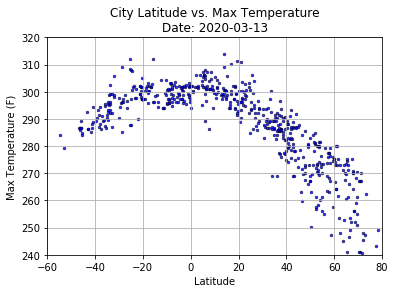

In [7]:
# Define data to plot
x_axis_lat_temp = main_df['Latitude']
y_axis_lat_temp = main_df['Max Temp']

# chart parameters
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(round_dn(x_axis_lat_temp.min()),\
         round_up(x_axis_lat_temp.max()))
plt.ylim(round_dn(y_axis_lat_temp.min()),\
         round_up(y_axis_lat_temp.max()))
plt.title(f"City Latitude vs. Max Temperature\nDate: {today}")
plt.grid(linestyle = "-", linewidth = 0.8)
plt.scatter(x_axis_lat_temp, y_axis_lat_temp, linewidths=0.5, \
            marker ='o', facecolors='b', edgecolors='k', alpha= 0.8, s = 8)

# plot and save image file "*.png"
file_name = "Images/" + y_axis_lat_temp.name
plt.savefig(file_name)
plt.show()

#### Latitude vs. Humidity Plot

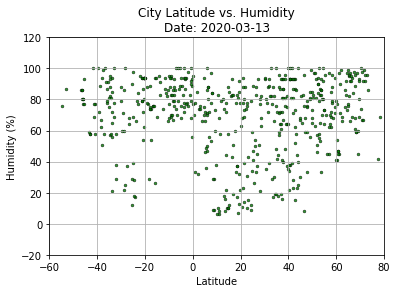

In [24]:
# Define data to plot
x_axis_lat_humd = main_df['Latitude']
y_axis_lat_humd = main_df['Humidity']

# chart parameters
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(round_dn(x_axis_lat_humd.min()),\
         round_up(x_axis_lat_humd.max()))
plt.ylim(round_dn(y_axis_lat_humd.min()) - 20,\
         round_up(y_axis_lat_humd.max()) + 20)
plt.title(f"City Latitude vs. Humidity\nDate: {today}")
plt.grid(linestyle = "-", linewidth = 0.8)
plt.scatter(x_axis_lat_humd, y_axis_lat_humd, linewidths=0.5, \
            marker ='o', facecolors='g', edgecolors='k', alpha= 0.8, s = 8)

# plot and save image file "*.png"
file_name = "Images/" + y_axis_lat_humd.name
plt.savefig(file_name)
plt.show()

#### Latitude vs. Cloudiness Plot

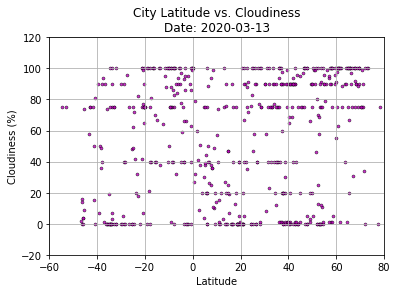

In [9]:
# define data to plot
x_axis_lat_cld = main_df['Latitude']
y_axis_lat_cld = main_df['Cloudiness']

# chart parameters
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(round_dn(x_axis_lat_cld.min()),\
         round_up(x_axis_lat_cld.max()))
plt.ylim(round_dn(y_axis_lat_cld.min()) - 20,\
         round_up(y_axis_lat_cld.max()) + 20)
plt.title(f"City Latitude vs. Cloudiness\nDate: {today}")
plt.grid(linestyle = "-", linewidth = 0.8)
plt.scatter(x_axis_lat_cld, y_axis_lat_cld, linewidths=0.5, \
            marker ='o', facecolors = 'm', edgecolors = 'k',\
            alpha = 0.8, s = 9)

# plot and save image file "*.png"
file_name = "Images/" + y_axis_lat_cld.name
plt.savefig(file_name)
plt.show()

#### Latitude vs. Wind Speed Plot

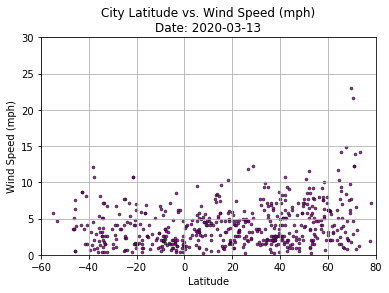

In [10]:
# define data to plot
x_axis_lat_wnspd = main_df['Latitude']
y_axis_lat_wnspd = main_df['Wind Speed']

# chart parameters
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(round_dn(x_axis_lat_wnspd.min()),\
         round_up(x_axis_lat_wnspd.max()))
plt.ylim(round_dn(y_axis_lat_wnspd.min()),\
         round_up(y_axis_lat_wnspd.max()))
plt.title(f"City Latitude vs. Wind Speed (mph)\nDate: {today}")
plt.grid(linestyle = "-", linewidth = 0.8)
plt.scatter(x_axis_lat_wnspd, y_axis_lat_wnspd, linewidths=0.5, \
            marker ='o', facecolors = 'purple', edgecolors = 'k',\
            alpha = 0.8, s = 9)

# plot and save image file "*.png"
file_name = "Images/" + y_axis_lat_wnspd.name
plt.savefig(file_name)
plt.show()

## Linear Regression

In [27]:
# OPTIONAL: Create a function to create Linear Regression plots
# Print out the r-squared value along with the plot.
def lin_regr (x_lin, y_lin, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_lin, y_lin)
    
     # print r-sqr values
    print('---------------------------------------------')
    print(f"The r-squared value is: \033[1;34m{round(rvalue, 2)}\033[00m") 
    
    # regression equation
    regress_values = x_lin * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f'Linear Regression: \033[1;31m{line_eq}\033[00m')
    print('---------------------------------------------')
    
    # create plot parameters
    plt.scatter(x_lin, y_lin, linewidths=0.5, \
            marker ='o', facecolors = 'g', edgecolors = 'k',\
            alpha = 0.8, s = 10)
    plt.plot(x_lin,regress_values,"r-", )
    x_var_mean = x_lin.median()
    y_var_mean = (y_lin.mean() + y_lin.max()) /2
    plt.annotate(line_eq,
                 xy = (x_var_mean, y_var_mean),
                 xycoords='data',
                 xytext=(5, -5),
                 va='bottom',
                 textcoords='offset points', 
                 fontsize=15, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(linestyle = "-", linewidth = 0.3)
    
    
    # print correct hemisphere region for chart name and title based on latitude
    if x_lin.mean() < 0:   # South hemisphere : negative latitudes
        title =  f'Southern Hemisphere | Date: {today}\n{x_label} vs. {y_label}'
        plt.title(title)
        file_name = "Images/" + "Southern_" + y_lin.name
        plt.savefig(file_name)
                 
    else:
        title =  f'Northern Hemisphere | Date: {today}\n{x_label} vs. {y_label}'
        plt.title(title)
        file_name = "Images/" + "Northern_" + y_lin.name
        plt.savefig(file_name)  

---------------------------------------------
The r-squared value is: 0.24
Linear Regression: y = 0.02x + 3.67
---------------------------------------------


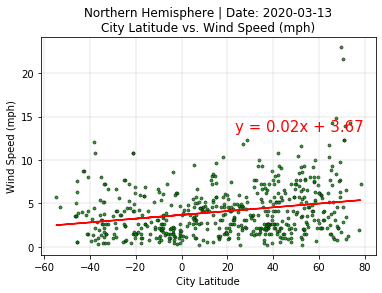

In [28]:
# TEST if the function is working

x_axis_lat_wnspd = main_df['Latitude']
y_axis_lat_wnspd = main_df['Wind Speed']
x_label = 'City Latitude'
y_label = 'Wind Speed (mph)'

lin_regr (x_axis_lat_wnspd, y_axis_lat_wnspd, x_label, y_label)

# Delete the trial run picture after verifying
import os
try:
    os.remove("Images/" + "Southern_" + y_axis_lat_wnspd.name + ".png")
except: 
    os.remove("Images/" + "Northern_" + y_axis_lat_wnspd.name + ".png")


In [29]:
# Create Northern and Southern Hemisphere DataFrames
nth_hem_df = main_df.loc[main_df["Latitude"] > 0, :]
nth_hem_df

,City_ID,Country,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temp,Wind Speed
3,3,US,1584087844,32.70,-103.14,75,100,286.48,2.10
5,5,CN,1584087857,27.12,114.98,100,93,287.21,3.09
9,9,CA,1584087857,69.45,-133.04,100,80,250.88,7.66
11,11,US,1584087858,19.73,-155.09,1,78,295.37,1.50
14,14,US,1584087858,40.60,-124.16,1,100,279.15,2.60
...,...,...,...,...,...,...,...,...,...
545,545,GE,1584087946,41.73,45.33,75,39,291.15,1.50
548,548,BY,1584087946,52.15,25.54,0,51,281.14,6.45
549,549,NE,1584087946,19.75,10.25,0,22,292.86,5.97
550,550,RU,1584087946,58.38,58.32,100,96,273.69,5.12


In [30]:
sth_hem_df = main_df.loc[main_df["Latitude"] < 0, :]
sth_hem_df

,City_ID,Country,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temp,Wind Speed
0,0,MU,1584087856,-20.52,57.52,75,94,297.15,1.50
1,1,MV,1584087856,-0.60,73.08,0,68,302.06,4.64
2,2,TO,1584087856,-21.20,-175.20,75,94,299.15,4.10
4,4,PE,1584087857,-9.09,-78.58,100,69,296.94,1.93
6,6,AR,1584087857,-54.80,-68.30,75,76,284.15,5.70
...,...,...,...,...,...,...,...,...,...
532,532,NA,1584087944,-24.63,17.97,72,18,300.53,2.33
535,535,ID,1584087944,-0.88,131.25,100,90,298.83,1.98
540,540,AU,1584087945,-35.72,150.18,74,79,295.37,5.36
546,546,CL,1584087946,-39.63,-72.33,90,100,289.15,0.67


In [31]:
# Verify data integrity after splitting

if len(main_df.index) == len(sth_hem_df.index) + len(nth_hem_df.index):
    print(f'All records are accounted for.')
else:
    print(f'Missing {len(main_df.index) - len(sth_hem_df.index) + len(nth_hem_df.index)} records.')

All records are accounted for.


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: -0.88
Linear Regression: y = -0.7x + 309.8
---------------------------------------------


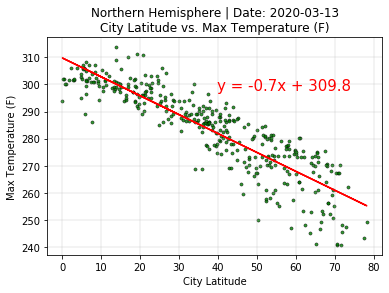

In [32]:
# define data to plot 
x_axis_lat = nth_hem_df['Latitude']
y_axis_lat = nth_hem_df['Max Temp']

# chart parameters
x_label = 'City Latitude'
y_label = 'Max Temperature (F)'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: 0.64
Linear Regression: y = 0.27x + 302.34
---------------------------------------------


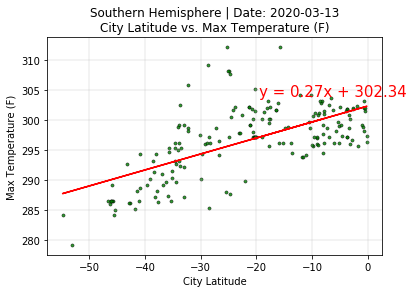

In [33]:
# define data to plot 
x_axis_lat = sth_hem_df['Latitude']
y_axis_lat = sth_hem_df['Max Temp']

# chart parameters
x_label = 'City Latitude'
y_label = 'Max Temperature (F)'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: 0.31
Linear Regression: y = 0.39x + 51.29
---------------------------------------------


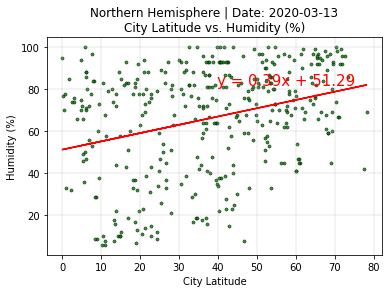

In [34]:
# define data to plot 
x_axis_lat = nth_hem_df['Latitude']
y_axis_lat = nth_hem_df['Humidity']

# chart parameters
x_label = 'City Latitude'
y_label = 'Humidity (%)'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: 0.19
Linear Regression: y = 0.26x + 82.47
---------------------------------------------


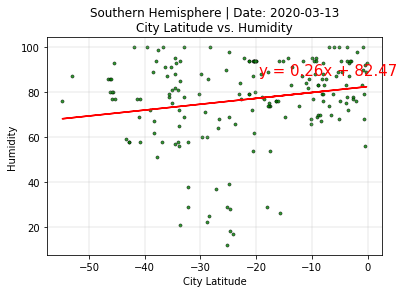

In [35]:
# define data to plot 
x_axis_lat = sth_hem_df['Latitude']
y_axis_lat = sth_hem_df['Humidity']

# chart parameters
x_label = 'City Latitude'
y_label = 'Humidity'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: 0.33
Linear Regression: y = 0.66x + 29.95
---------------------------------------------


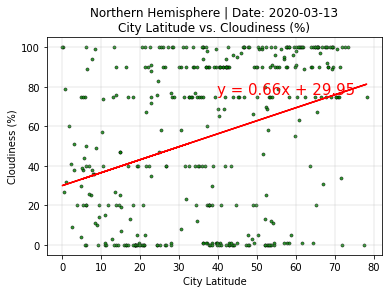

In [36]:
# define data to plot 
x_axis_lat = nth_hem_df['Latitude']
y_axis_lat = nth_hem_df['Cloudiness']

# chart parameters
x_label = 'City Latitude'
y_label = 'Cloudiness (%)'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: 0.37
Linear Regression: y = 1.02x + 77.59
---------------------------------------------


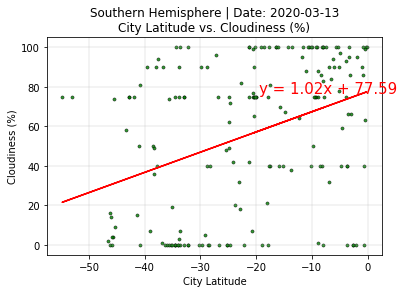

In [37]:
# define data to plot 
x_axis_lat = sth_hem_df['Latitude']
y_axis_lat = sth_hem_df['Cloudiness']

# chart parameters
x_label = 'City Latitude'
y_label = 'Cloudiness (%)'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: 0.24
Linear Regression: y = 0.04x + 3.05
---------------------------------------------


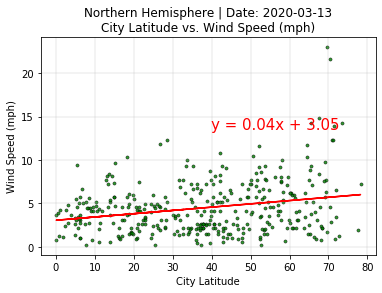

In [38]:
# define data to plot 
x_axis_lat = nth_hem_df['Latitude']
y_axis_lat = nth_hem_df['Wind Speed']

# chart parameters
x_label = 'City Latitude'
y_label = 'Wind Speed (mph)'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: -0.22
Linear Regression: y = -0.04x + 2.42
---------------------------------------------


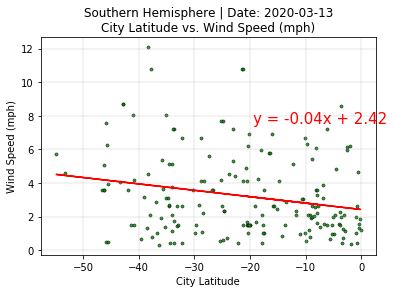

In [39]:
# define data to plot 
x_axis_lat = sth_hem_df['Latitude']
y_axis_lat = sth_hem_df['Wind Speed']

# chart parameters
x_label = 'City Latitude'
y_label = 'Wind Speed (mph)'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )